## Recurrent Neural Network (a sequential model)

Given data $X$ and $Y$, we want to feed information forward into a time stamp. Then we form some belief and we make some initial predictions. We investigate our beliefs by looking at the loss function of the initial guesses and the real value. We update our model according to error we observed. 

## Architecture: Feed-forward

Consider data with time stamp
$$X_{\langle 1 \rangle} \rightarrow X_{\langle 2 \rangle} \rightarrow \dots \rightarrow X_{\langle T \rangle}$$
and feed-forward architecture pass information through exactly as the following:
$$
\text{Information in:} \rightarrow
\begin{matrix}
\{Y_{\langle 1 \rangle}, ..., Y_{\langle k \rangle}\} & \{Y_{\langle 1 \rangle}, ..., Y_{\langle k \rangle}\} &       & \{Y_{\langle 1 \rangle}, ..., Y_{\langle k \rangle}\} \\
\updownarrow               & \updownarrow               &       & \updownarrow \\
\{\hat{Y}_{\langle 1 \rangle}, ..., \hat{Y}_{\langle k \rangle}\} & \{\hat{Y}_{\langle 1 \rangle}, ..., \hat{Y}_{\langle k \rangle}\} &       & \{\hat{Y}_{\langle 1 \rangle}, ..., \hat{Y}_{\langle k \rangle}\} \\
\uparrow               & \uparrow               &       & \uparrow \\
X_{\langle 1 \rangle} \rightarrow    & X_{\langle 2 \rangle} \rightarrow    & \dots \rightarrow & X_{\langle T \rangle} \\
\uparrow               & \uparrow               &       & \uparrow \\
w_{\langle 1 \rangle}, b_{0, \langle 1 \rangle}    & w_{\langle 2 \rangle}, b_{0, \langle 2 \rangle}    &       & w_{\langle T \rangle}, b_{0, \langle T \rangle} \\
\end{matrix}
\rightarrow
\text{Form beliefs about } Y_{\langle T \rangle}
$$
while the educated guesses $\hat{Y}_{\langle T \rangle}$ are our beliefs about real $Y$ at time stamp $T$. 

## Architecture: Feed-backward

Let us clearly define our loss function to make sure we have a proper grip of our mistakes. 
$$\mathcal{L} = \sum_t \sum_k L(\hat{y}_{\langle t,k \rangle} - y_{\langle t,k \rangle})^2$$
and we can compute the gradient 
$$\triangledown = \frac{\partial \mathcal{L}}{\partial a}$$
and then with respect with parameters $w$ and $b$
$$\frac{\partial \triangledown}{\partial w}, \frac{\partial \triangledown}{\partial a}$$
and now with perspective of where we make our mistakes according to our parameters we can go backward
$$
\text{Information in:} \leftarrow
\underbrace{
\begin{matrix}
\{Y_{\langle 1 \rangle}, ..., Y_{\langle k \rangle}\} & \{Y_{\langle 1 \rangle}, ..., Y_{\langle k \rangle}\} &       & \{Y_{\langle 1 \rangle}, ..., Y_{\langle k \rangle}\} \\
\updownarrow               & \updownarrow               &       & \updownarrow \\
\{\hat{Y}_{\langle 1 \rangle}, ..., \hat{Y}_{\langle k \rangle}\} & \{\hat{Y}_{\langle 1 \rangle}, ..., \hat{Y}_{\langle k \rangle}\} &       & \{\hat{Y}_{\langle 1 \rangle}, ..., \hat{Y}_{\langle k \rangle}\} \\
\uparrow               & \uparrow               &       & \uparrow \\
X_{\langle 1 \rangle} \leftarrow    & X_{\langle 2 \rangle} \leftarrow    & \dots \leftarrow & X_{\langle T \rangle} \\
\uparrow               & \uparrow               &       & \uparrow \\
w'_{\langle 1 \rangle}, b'_{0, \langle 1 \rangle}    & w'_{\langle 2 \rangle}, b'_{0, \langle 2 \rangle}    &       & w'_{\langle T \rangle}, b'_{0, \langle T \rangle} \\
\end{matrix}}_{\text{Update: } w, b \text{ with } w', b'}
\leftarrow
\text{Total Loss: } \mathcal{L} (\hat{y}, y)
$$
and the *update* action in the above architecture is dependent on your optimizer specified in the algorithm.

## Part 1

This section we walk readers through the procedure of concatenating stock data together. In practice, it is often times the case that we investigate a sector of stocks together. For example, in large capital stocks, an investor might be interested in investigating Apple, Microsoft, and Facebook together. In this case, it is a curiosity to see if one stock can be predicted using other similar stocks in its sector.

Here let us see if we can replicate this idea.

In [1]:
# libraries
import pandas as pd
import numpy as np
import yfinance as yf

ticker = 'AAPL'
start_date = '2012-01-01'
end_date = '2021-08-22'
w = 3
h = 5

# get data
stockData = yf.download(ticker, start_date, end_date)
stockData = stockData.iloc[:,:5] # omit volume

# create data
Y = stockData.iloc[w::, ]
X = np.arange(0, Y.shape[0]*w*h, 1).reshape(Y.shape[0], w*h)
for i in range(0,int(stockData.shape[0]-w)):
    X[i,] = np.array(stockData.iloc[i:(i+w),]).reshape(1, w*h)
    
ticker = 'MSFT'

# get data
stockData = yf.download(ticker, start_date, end_date)
stockData = stockData.iloc[:,:5] # omit volume

# create data
Y = stockData.iloc[w::, ]
X1 = np.arange(0, Y.shape[0]*w*h, 1).reshape(Y.shape[0], w*h)
for i in range(0,int(stockData.shape[0]-w)):
    X1[i,] = np.array(stockData.iloc[i:(i+w),]).reshape(1, w*h)

ticker = 'NFLX'

# get data
stockData = yf.download(ticker, start_date, end_date)
stockData = stockData.iloc[:,:5] # omit volume

# create data
Y = stockData.iloc[w::, ]
X2 = np.arange(0, Y.shape[0]*w*h, 1).reshape(Y.shape[0], w*h)
for i in range(0,int(stockData.shape[0]-w)):
    X2[i,] = np.array(stockData.iloc[i:(i+w),]).reshape(1, w*h)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
print(Y.shape)
print(X.shape)
print(X1.shape)
print(X2.shape)

(2422, 5)
(2422, 15)
(2422, 15)
(2422, 15)


In [3]:
X = np.concatenate([X, X1, X2], 1)

In [4]:
def myFct(c):
    c = np.array(c)
    return (c - c.min())/(c.max() - c.min())

In [5]:
X = pd.DataFrame(X).apply(myFct, 0)

In [6]:
X = np.array(X)

In [7]:
print(Y.shape)
print(X.shape)

(2422, 5)
(2422, 45)


## Part 2

Let us use proposed function *Autonomous_Neural_Sequence_Translation* to learn from the explanatory data matrix $X$ and predict response data matrix $Y$.

In [8]:
from YinCapital_forecast.modules import Autonomous_Neural_Sequence_Translation

------------------------------------------------------------------------------

            MANUAL: To install this python package, please use the following code.

            # In a python notebook:
            # !pip install git+https://github.com/yiqiao-yin/YinPortfolioManagement.git
            # In a command line:
            # pip install git+https://github.com/yiqiao-yin/YinPortfolioManagement.git

            # Run
            tmp = Autonomous_Neural_Sequence_Translation(
                X                 =   X,   # explanatory data matrix
                Y                 =   Y,   # response data matrix
                w                 =   1,
                h                 =   5,
                cutoff            =   0.8, # take a fraction between 0 and 1
                numOfHiddenLayer  =   3,   # take an integer from 1, 2, 3, 4, or 5
                numOfDense        =   2,   # take an integer from 1, 2, or 3
                l1_units          =   128,
                l2

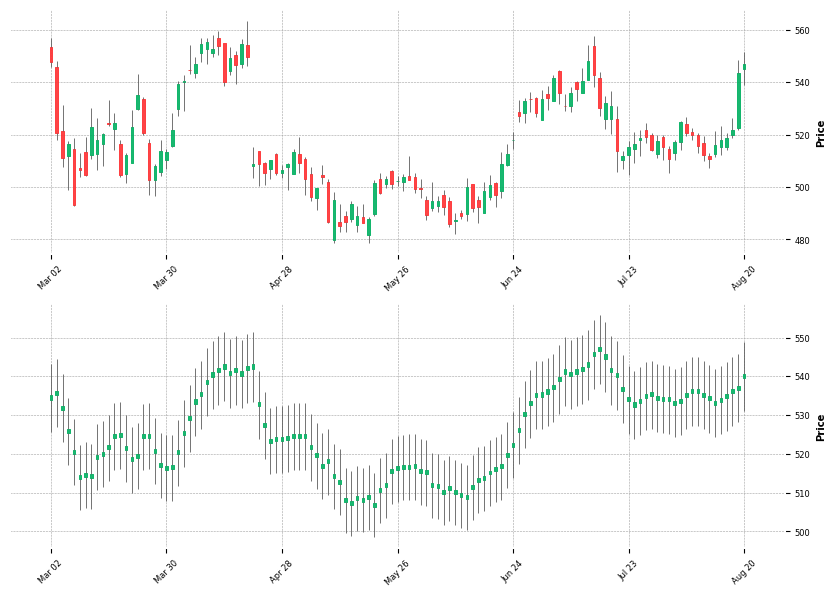

In [10]:
tmp = Autonomous_Neural_Sequence_Translation(
        X                 =   X,
        Y                 =   Y,
        w                 =   5,
        h                 =   9,
        cutoff            =   0.95,
        numOfHiddenLayer  =   4,
        numOfDense        =   3,
        l1_units          =   128,
        l2_units          =   128,
        l3_units          =   32,
        l4_units          =   32,
        l5_units          =   10,
        dropOutRate       =   0.2,
        optimizer         =   'adam',
        loss              =   'mean_squared_error',
        epochs            =   50,
        batch_size        =   32,
        plotGraph         =   False,
        useMPLFinancePlot =   True,
        verbose           =   True )

Ends here.